# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 598


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [6]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Metric&"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&q={city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

         # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                           "Lng": city_lng, 
                           "Max Temp": city_max_temp,
                           "Humidity": city_humidity,
                           "Cloudiness": city_clouds,
                           "Wind Speed": city_wind,
                           "Country": city_country,
                           "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
 # Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

       

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | adamstown
Processing Record 2 of Set 1 | port-aux-francais
Processing Record 3 of Set 1 | waitangi
Processing Record 4 of Set 1 | sao raimundo das mangabeiras
Processing Record 5 of Set 1 | invercargill
Processing Record 6 of Set 1 | puerto san jose
Processing Record 7 of Set 1 | blackmans bay
Processing Record 8 of Set 1 | taltal
Processing Record 9 of Set 1 | stanley
Processing Record 10 of Set 1 | hilo
Processing Record 11 of Set 1 | qaqortoq
Processing Record 12 of Set 1 | albany
Processing Record 13 of Set 1 | leninskoye
Processing Record 14 of Set 1 | college
Processing Record 15 of Set 1 | tiksi
Processing Record 16 of Set 1 | lompoc
Processing Record 17 of Set 1 | ust-nera
Processing Record 18 of Set 1 | cidreira
Processing Record 19 of Set 1 | margaret river
Processing Record 20 of Set 1 | castillos
Processing Record 21 of Set 1 | klyuchi
Processing Record 22 of Set 1 | lerwick
Processin

Processing Record 39 of Set 4 | cartagena del chaira
Processing Record 40 of Set 4 | pizarro
Processing Record 41 of Set 4 | isle of lewis
City not found. Skipping...
Processing Record 42 of Set 4 | urumqi
Processing Record 43 of Set 4 | udachny
Processing Record 44 of Set 4 | taoudenni
Processing Record 45 of Set 4 | christchurch
Processing Record 46 of Set 4 | longyearbyen
Processing Record 47 of Set 4 | chibougamau
Processing Record 48 of Set 4 | mamou
Processing Record 49 of Set 4 | dingras
Processing Record 0 of Set 5 | touros
Processing Record 1 of Set 5 | manaure
Processing Record 2 of Set 5 | igrim
Processing Record 3 of Set 5 | cambria
Processing Record 4 of Set 5 | port alfred
Processing Record 5 of Set 5 | wamba
Processing Record 6 of Set 5 | yashkino
Processing Record 7 of Set 5 | fuglafjordur
Processing Record 8 of Set 5 | wad az zaki
Processing Record 9 of Set 5 | anadyr
Processing Record 10 of Set 5 | leshan
Processing Record 11 of Set 5 | palikir - national government c

Processing Record 32 of Set 8 | cabedelo
Processing Record 33 of Set 8 | namdrik
Processing Record 34 of Set 8 | manokwari
Processing Record 35 of Set 8 | mantua
Processing Record 36 of Set 8 | korla
Processing Record 37 of Set 8 | riosucio
Processing Record 38 of Set 8 | leua
Processing Record 39 of Set 8 | prachuap khiri khan
Processing Record 40 of Set 8 | nastola
Processing Record 41 of Set 8 | san antonio
Processing Record 42 of Set 8 | tshikapa
Processing Record 43 of Set 8 | pocone
Processing Record 44 of Set 8 | saipan
Processing Record 45 of Set 8 | fort st. john
Processing Record 46 of Set 8 | nouadhibou
Processing Record 47 of Set 8 | vila franca do campo
Processing Record 48 of Set 8 | yulinshi
Processing Record 49 of Set 8 | rajapur
Processing Record 0 of Set 9 | selfoss
Processing Record 1 of Set 9 | ca mau
Processing Record 2 of Set 9 | metu
Processing Record 3 of Set 9 | benjamin constant
Processing Record 4 of Set 9 | the bottom
Processing Record 5 of Set 9 | igarka
Pr

Processing Record 22 of Set 12 | george town
Processing Record 23 of Set 12 | pacasmayo
Processing Record 24 of Set 12 | bengkulu
Processing Record 25 of Set 12 | qa'en
Processing Record 26 of Set 12 | navalmoral de la mata
Processing Record 27 of Set 12 | popondetta
Processing Record 28 of Set 12 | fujin
Processing Record 29 of Set 12 | kourou
Processing Record 30 of Set 12 | huanan
Processing Record 31 of Set 12 | papao
Processing Record 32 of Set 12 | carolina beach
Processing Record 33 of Set 12 | manacapuru
Processing Record 34 of Set 12 | namibe
Processing Record 35 of Set 12 | ta`u
Processing Record 36 of Set 12 | pankrushikha
Processing Record 37 of Set 12 | mae hong son
Processing Record 38 of Set 12 | minab
Processing Record 39 of Set 12 | puente alto
Processing Record 40 of Set 12 | saint-mandrier-sur-mer
Processing Record 41 of Set 12 | cidade velha
Processing Record 42 of Set 12 | virginia
Processing Record 43 of Set 12 | kormend
Processing Record 44 of Set 12 | shenjiamen

In [7]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)


# Show Record Count
city_data_df.count()

City          577
Lat           577
Lng           577
Max Temp      577
Humidity      577
Cloudiness    577
Wind Speed    577
Country       577
Date          577
dtype: int64

In [8]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,adamstown,-25.0660,-130.1015,23.15,78,30,4.46,PN,1698028496
1,port-aux-francais,-49.3500,70.2167,2.11,67,83,13.37,TF,1698028496
2,waitangi,-43.9535,-176.5597,10.46,67,82,3.13,NZ,1698028496
3,sao raimundo das mangabeiras,-7.0219,-45.4811,28.98,50,85,1.93,BR,1698028496
4,invercargill,-46.4000,168.3500,15.01,69,98,4.47,NZ,1698028496


In [9]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [10]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,adamstown,-25.0660,-130.1015,23.15,78,30,4.46,PN,1698028496
1,port-aux-francais,-49.3500,70.2167,2.11,67,83,13.37,TF,1698028496
2,waitangi,-43.9535,-176.5597,10.46,67,82,3.13,NZ,1698028496
3,sao raimundo das mangabeiras,-7.0219,-45.4811,28.98,50,85,1.93,BR,1698028496
4,invercargill,-46.4000,168.3500,15.01,69,98,4.47,NZ,1698028496


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

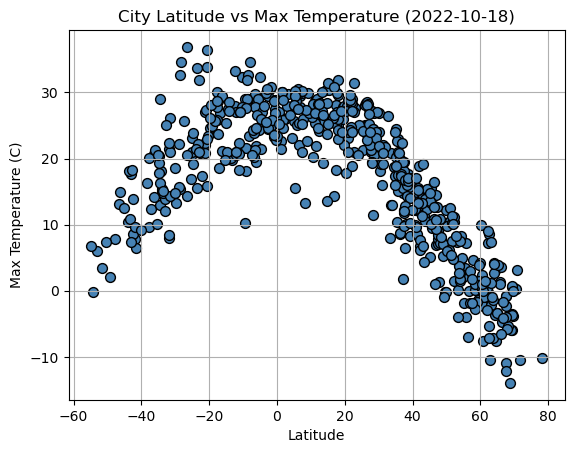

<Figure size 640x480 with 0 Axes>

In [11]:
# Build scatter plot for latitude vs. temperature
city_data_df.plot.scatter(x='Lat', y='Max Temp', c='steelblue', s=50, edgecolor= "black")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.title('City Latitude vs Max Temperature (2022-10-18)')
plt.grid(True)
plt.show()


# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

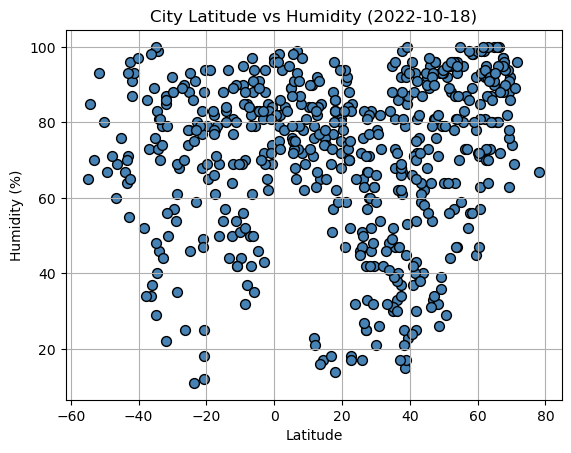

<Figure size 640x480 with 0 Axes>

In [12]:
# Build the scatter plots for latitude vs. humidity
city_data_df.plot.scatter(x='Lat', y='Humidity', c='steelblue', s=50, edgecolor= "black")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('City Latitude vs Humidity (2022-10-18)')
plt.grid(True)
plt.show()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

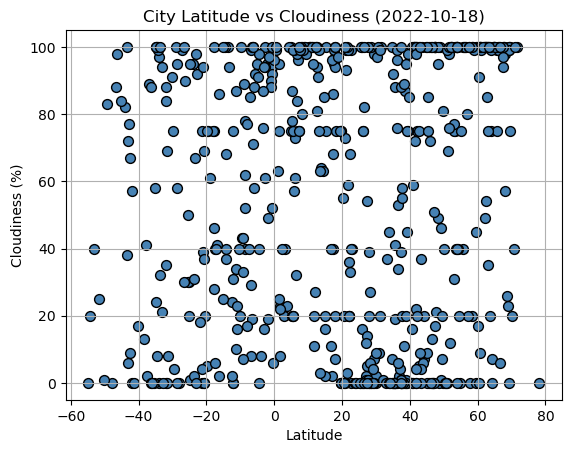

<Figure size 640x480 with 0 Axes>

In [13]:
# Build the scatter plots for latitude vs. cloudiness
city_data_df.plot.scatter(x='Lat', y='Cloudiness', c='steelblue', s=50, edgecolor= "black")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('City Latitude vs Cloudiness (2022-10-18)')
plt.grid(True)
plt.show()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

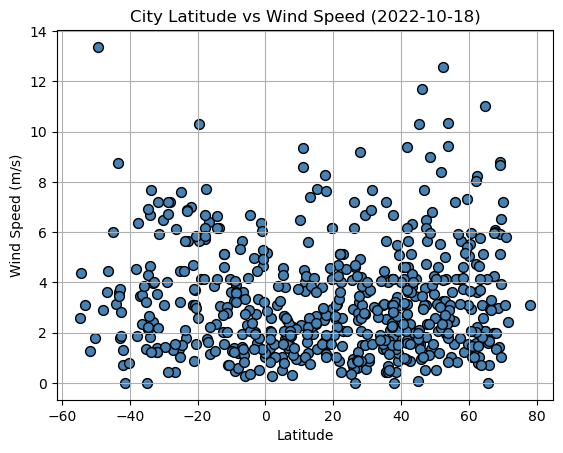

<Figure size 640x480 with 0 Axes>

In [14]:
# Build the scatter plots for latitude vs. wind speed
city_data_df.plot.scatter(x='Lat', y='Wind Speed', c='steelblue', s=50, edgecolor= "black")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.title('City Latitude vs Wind Speed (2022-10-18)')
plt.grid(True)
plt.show()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [15]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, label,coordinates):
    
    # Compute linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Plot
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,coordinates,fontsize=15,color="red")
    plt.xlabel("Latitude")
    plt.ylabel(label)
    print(f"The r-value is: {rvalue**2}")
    plt.show()

In [16]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
5,puerto san jose,13.9256,-90.8244,25.69,85,64,1.93,GT,1698028497
8,stanley,54.8680,-1.6985,2.06,100,0,1.03,GB,1698028492
9,hilo,19.7297,-155.0900,27.85,75,0,6.17,US,1698028497
10,qaqortoq,60.7167,-46.0333,1.62,63,100,1.35,GL,1698028498
11,albany,42.6001,-73.9662,6.40,76,100,0.89,US,1698028415


In [17]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,adamstown,-25.0660,-130.1015,23.15,78,30,4.46,PN,1698028496
1,port-aux-francais,-49.3500,70.2167,2.11,67,83,13.37,TF,1698028496
2,waitangi,-43.9535,-176.5597,10.46,67,82,3.13,NZ,1698028496
3,sao raimundo das mangabeiras,-7.0219,-45.4811,28.98,50,85,1.93,BR,1698028496
4,invercargill,-46.4000,168.3500,15.01,69,98,4.47,NZ,1698028496


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.8248836222581674


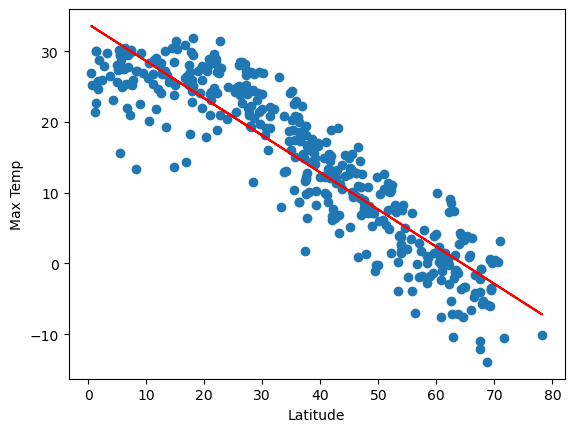

In [18]:
# Linear regression on Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"], "Max Temp",(10,270))

The r-value is: 0.4994471077104671


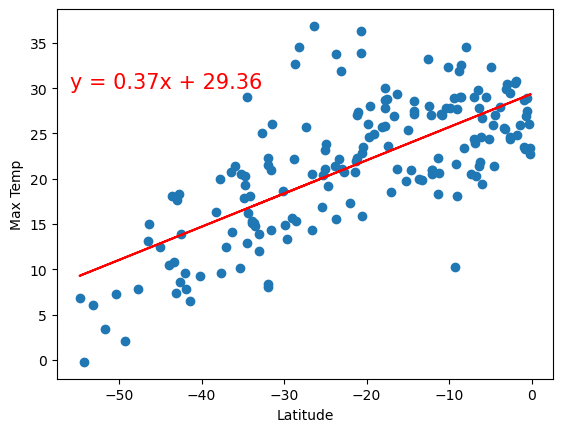

In [26]:
# Linear regression on Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"], "Max Temp",(-56,30))

**Discussion about the linear relationship:** There is a strong positive correlation between latitude and Max Temp in northern hemisphere and strong negative correlation in southern hemisphere.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.020909529582944158


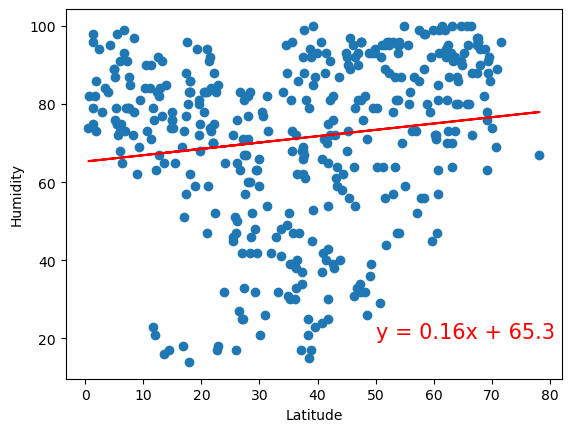

In [20]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Humidity"], "Humidity",(50,20))

The r-value is: 0.0014080774729760145


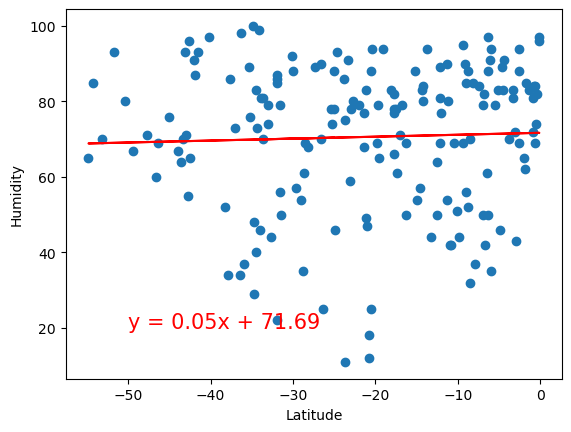

In [21]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Humidity"], "Humidity",(-50,20))

**Discussion about the linear relationship:** There is close to zero correlation between latitude and humidity at both hemispheres. 

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.00895184586513431


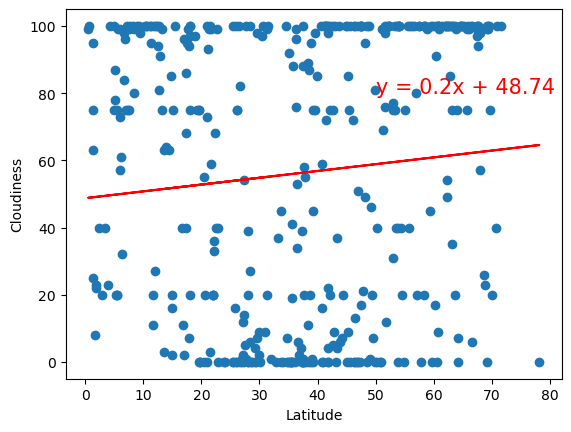

In [22]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"], "Cloudiness",(50,80))

The r-value is: 0.03302160616421466


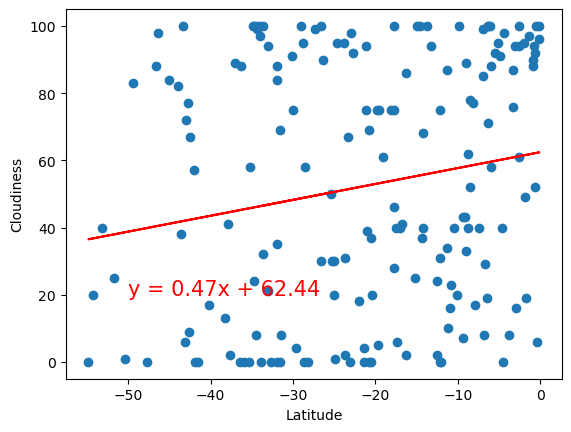

In [23]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"], "Cloudiness",(-50,20))

**Discussion about the linear relationship:** There is close to zero or no correlation between latitude and cloudiness at both hemispheres. 

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.028729550779413728


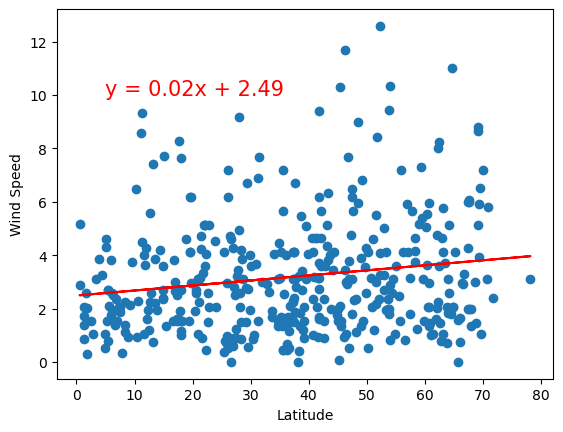

In [24]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"], "Wind Speed",(5,10))

The r-value is: 0.010355448794038694


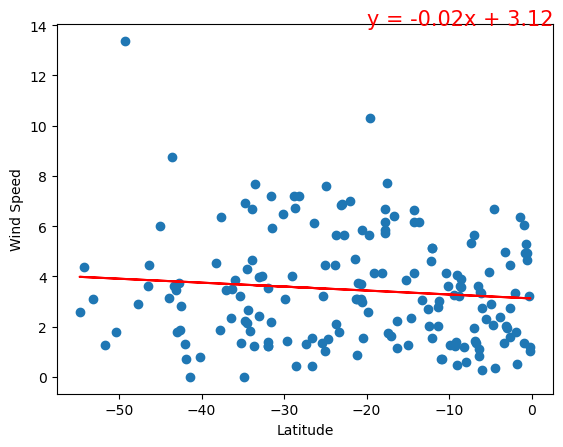

In [25]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"], "Wind Speed",(-20,14))

**Discussion about the linear relationship:** There is no significant correlation between latitude and wind speed at both hemispheres. 